In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,\
RidgeCV, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [203]:
pd.options.display.max_rows
pd.options.display.max_rows = 70
pd.options.display.max_rows

70

In [204]:
ch89dg = pd.read_csv('../data/cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('../data/cleaned_data/ch89m.csv')
ch89pru = pd.read_csv('../data/cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('../data/cleaned_data/ch89q.csv')

In [116]:
ch89q.columns

Index(['Unnamed: 0', 'county', 'sex', 'xiang', 'q001', 'q002', 'q003', 'q004',
       'q005', 'q006',
       ...
       'q238', 'q239', 'q240', 'q241', 'q242', 'q243', 'q244', 'q245', 'q246',
       'q247'],
      dtype='object', length=251)

In [7]:
ch89q

,Unnamed: 0,county,sex,xiang,q001,q002,q003,q004,q005,q006,...,q238,q239,q240,q241,q242,q243,q244,q245,q246,q247
0,0,AA,M,1,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,33.8,1.13,1.42,1.05,16.6,1.03
1,1,AA,M,2,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,29.6,1.09,1.36,1.05,15.7,0.99
2,2,AA,M,3,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,31.7,1.11,1.39,1.05,16.2,1.01
3,3,AA,F,1,NaN,NaN,NaN,NaN,10.0,0.0,...,11.5,92.3,88.5,3.8,31.8,1.08,1.41,1.04,15.9,0.99
4,4,AA,F,2,NaN,NaN,NaN,NaN,12.5,0.0,...,12.0,88.0,80.0,6.0,28.5,1.04,1.34,1.03,15.4,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,YA,F,2,NaN,NaN,NaN,NaN,16.7,0.0,...,0.6,99.3,18.8,1.3,NaN,NaN,NaN,NaN,NaN,NaN
617,617,YA,F,3,NaN,NaN,NaN,NaN,13.3,0.0,...,6.5,97.2,25.7,3.1,30.5,1.03,1.31,0.97,17.6,1.09
618,618,YA,T,1,1.89,6.0,0.5,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,619,YA,T,2,1.40,7.0,0.4,201.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Part1: exploratory data analysis

In [8]:
df = ch89dg.drop(columns='Unnamed: 0').copy()

In [9]:
df

,county,sex,xiang,d001,d002,d003,d004,d005,d006,d007,...,d157,d158,d159,d160,d161,g001,g002,g003,g004,g005
0,AA,T,1,2678.0,87.2,65.8,397.0,29.8,9.9,2.7,...,0.519,0.011,0.017,0.013,0.052,NaN,NaN,NaN,NaN,NaN
1,AA,T,2,2637.0,69.8,65.0,432.0,23.2,9.8,2.4,...,0.466,0.021,0.027,0.017,0.024,NaN,NaN,NaN,NaN,NaN
2,AA,T,3,2658.0,78.5,65.4,415.0,26.5,9.9,2.6,...,0.493,0.016,0.022,0.015,0.038,31.1,121.4,50.0,1.0,4.0
3,AB,T,1,2633.0,64.8,64.7,440.0,21.9,10.0,1.9,...,0.397,0.013,0.013,0.014,0.043,NaN,NaN,NaN,NaN,NaN
4,AB,T,2,2788.0,65.1,67.2,479.0,20.9,9.7,1.9,...,0.413,0.024,0.026,0.005,0.014,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,XB,T,2,2472.0,20.9,66.0,505.0,7.6,10.7,0.0,...,0.377,0.001,0.001,0.001,0.001,NaN,NaN,NaN,NaN,NaN
202,XB,T,3,2862.0,23.9,76.5,586.0,7.6,10.7,0.0,...,0.379,0.001,0.001,0.001,0.001,35.6,106.1,1750.0,3.0,3.0
203,YA,T,1,2111.0,61.0,70.6,318.0,25.9,13.4,4.9,...,3.249,0.001,0.002,0.001,0.043,NaN,NaN,NaN,NaN,NaN
204,YA,T,2,1872.0,45.5,63.7,300.0,22.0,13.9,4.7,...,0.778,0.001,0.002,0.001,0.044,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['county', 'sex', 'xiang', 'd001', 'd002', 'd003', 'd004', 'd005',
       'd006', 'd007',
       ...
       'd157', 'd158', 'd159', 'd160', 'd161', 'g001', 'g002', 'g003', 'g004',
       'g005'],
      dtype='object', length=169)

In [11]:
df['county'].fillna('NA', inplace=True)

In [12]:
# diet survey CALORIC INTAKE (kcal/day/reference man)
df[df['xiang']==3].d001.describe()

count      69.000000
mean     2406.492754
std       324.448429
min      1579.000000
25%      2198.000000
50%      2433.000000
75%      2605.000000
max      3066.000000
Name: d001, dtype: float64

In [13]:
# diet survey TOTAL PROTEIN INTAKE (g/day/reference man)
df[df['xiang']==3].d003.describe()

count    69.000000
mean     59.081159
std       8.879144
min      40.700000
25%      52.400000
50%      58.100000
75%      65.400000
max      82.800000
Name: d003, dtype: float64

,d005,d006,d007,d008,d009
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,18.278261,9.947826,1.265217,8.691304,71.253623
std,5.832487,1.439425,1.349273,1.613248,6.183364
min,7.400000,6.600000,0.000000,5.700000,55.900000
25%,13.700000,9.000000,0.300000,7.300000,66.600000
50%,18.400000,10.000000,0.900000,8.500000,72.600000
75%,22.000000,11.000000,1.700000,9.900000,76.200000
max,32.600000,13.700000,5.800000,13.000000,82.200000


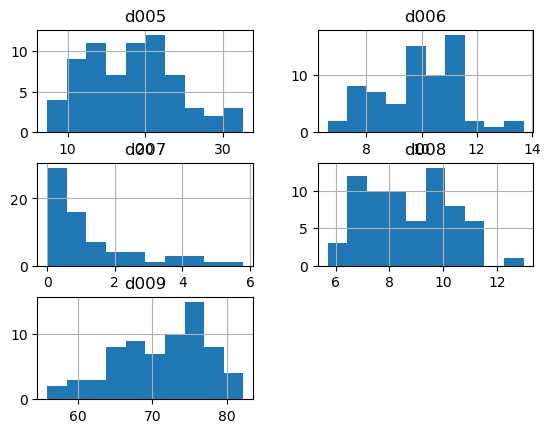

In [137]:
df[df['xiang']==3].loc[:,'d005':'d009'].hist();
df[df['xiang']==3].loc[:,'d005':'d009'].describe()
# percentage caloric intake from
#       fat --  protein - animal ptn - plant ptn - carbs

,d012,d013,d014,d015,d016
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,682.347826,25.613043,120.240580,1.918841,0.726087
std,410.514413,10.542113,54.320804,0.668025,0.155915
min,77.000000,5.100000,28.900000,0.900000,0.400000
25%,420.000000,17.500000,82.900000,1.400000,0.600000
50%,594.000000,25.400000,111.400000,2.000000,0.700000
75%,848.000000,34.600000,157.700000,2.400000,0.800000
max,2009.000000,53.600000,344.900000,3.700000,1.200000


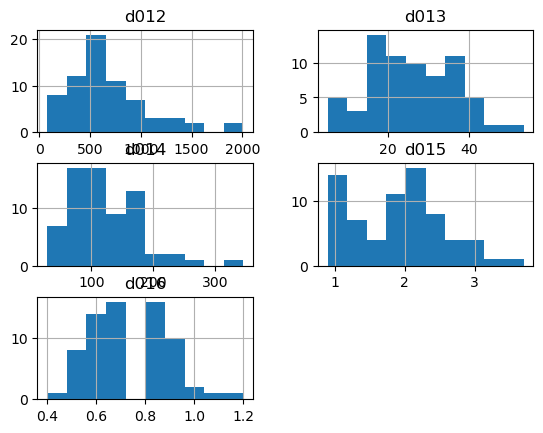

In [138]:
df[df['xiang']==3].loc[:,'d012':'d016'].hist();
df[df['xiang']==3].loc[:,'d012':'d016'].describe()
# mg/day/person intake of vitamins
#        vit A  --   vit E --  vit C --  vit B1 -- vit B2

,d028,d029,d030,d031,d032,d033,d034,d035,d036
count,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1082.579710,77.308696,1159.84058,92.975362,7.042029,51.539130,7.556522,87.788406,12.253623
std,214.691188,74.382467,190.46133,6.880950,6.886803,11.410357,7.487627,11.979425,11.979229
min,669.000000,0.000000,825.00000,73.000000,0.000000,28.800000,0.000000,52.500000,0.000000
25%,916.000000,25.600000,1006.00000,88.600000,2.000000,41.800000,1.600000,81.000000,3.200000
50%,1055.000000,54.000000,1151.00000,95.400000,4.700000,52.100000,5.400000,91.400000,8.600000
75%,1217.000000,117.000000,1271.00000,98.000000,11.400000,58.500000,9.900000,96.800000,19.100000
max,1656.000000,367.600000,1684.00000,100.000000,27.100000,79.300000,29.400000,100.000000,47.500000


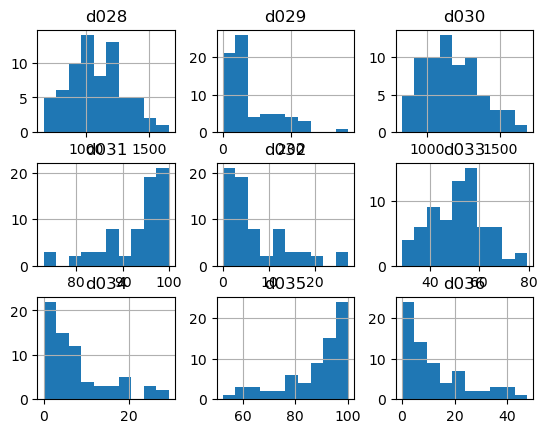

In [139]:
df[df['xiang']==3].loc[:,'d028':'d036'].hist();
df[df['xiang']==3].loc[:,'d028':'d036'].describe()
# intake from 
#      pl food -- anl food -- tot food -- % pl fd - % anl fd - pl pt -- anl pt -- % pl pt -- % anl pt

,d037,d038,d039,d040
count,69.000000,69.000000,69.000000,69.000000
mean,299.120290,168.391304,51.584058,147.772464
std,215.197818,214.614754,99.089291,172.160451
min,0.000000,0.000000,0.000000,0.000000
25%,21.400000,8.700000,0.000000,34.600000
50%,382.800000,37.600000,0.800000,90.300000
75%,477.200000,335.800000,61.000000,185.400000
max,599.500000,676.300000,492.300000,788.500000


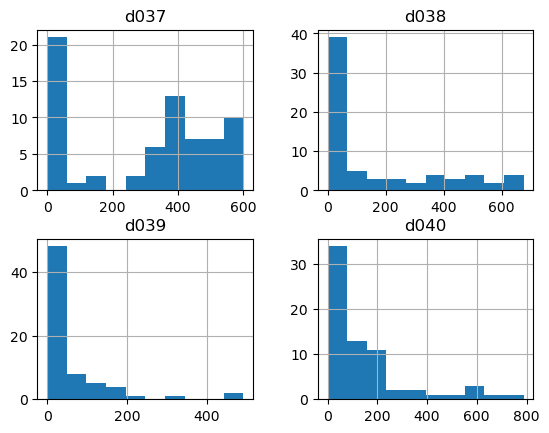

In [140]:
df[df['xiang']==3].loc[:,'d037':'d040'].hist();
df[df['xiang']==3].loc[:,'d037':'d040'].describe()
# different carbs (g/day/person)
#        rice   --  wheat  --  cereal  -- starch

,d041,d042,d043,d044,d045,d046
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,21.389855,160.020290,148.798551,21.494203,14.273913,2.279710
std,22.722392,118.277982,95.226943,27.175275,33.632668,6.899138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,65.700000,71.000000,2.900000,0.000000,0.000000
50%,15.300000,136.900000,135.100000,14.300000,0.700000,0.100000
75%,32.400000,215.500000,221.200000,26.100000,9.900000,1.400000
max,104.600000,510.600000,434.900000,151.500000,197.800000,52.400000


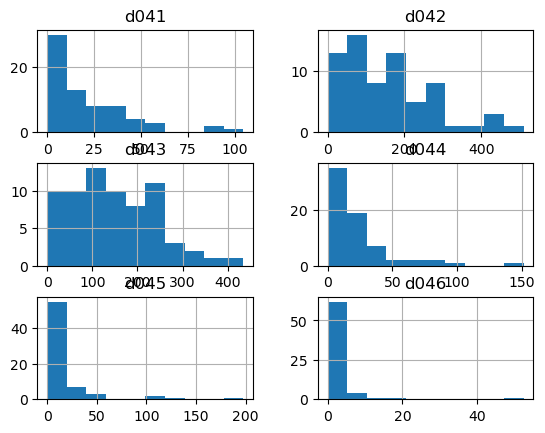

In [141]:
df[df['xiang']==3].loc[:,'d041':'d046'].hist();
df[df['xiang']==3].loc[:,'d041':'d046'].describe()
# plant food items (g/day/person)
#   legume -- light col veg -- grn veg - dry/pickl veg - fruit - nut

,d047,d048,d049,d050,d051,d052
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,7.966667,4.204348,32.881159,29.334783,3.546377,25.665217
std,39.912178,4.649049,25.174475,23.687610,4.376998,40.981771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,14.000000,12.800000,0.000000,0.000000
50%,0.000000,2.600000,32.900000,25.800000,2.300000,6.100000
75%,0.000000,7.700000,47.600000,43.000000,5.900000,29.900000
max,292.200000,18.000000,104.400000,104.400000,17.500000,184.700000


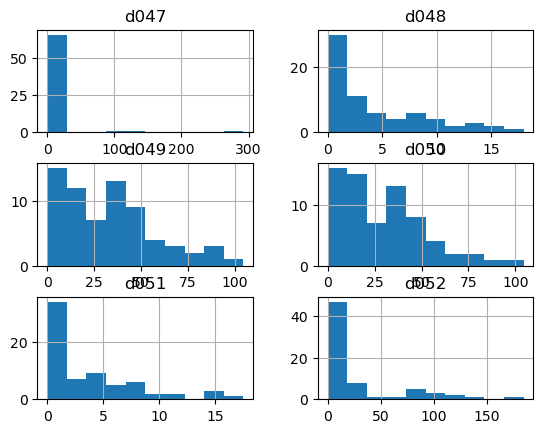

In [142]:
df[df['xiang']==3].loc[:,'d047':'d052'].hist();
df[df['xiang']==3].loc[:,'d047':'d052'].describe()
# animal product intake (g/day/person)
#        milk --   eggs   -- all meat -- red meat - poultry -- fish

,g001,g002,g003,g004,g005
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,31.689855,112.639130,413.768116,1.623188,4.014493
std,6.299256,8.573973,527.803025,0.971679,1.265989
min,21.500000,82.800000,0.000000,1.000000,2.000000
25%,26.500000,108.600000,50.000000,1.000000,3.000000
50%,31.200000,113.300000,100.000000,1.000000,4.000000
75%,36.000000,118.800000,750.000000,3.000000,5.000000
max,46.300000,132.200000,2500.000000,4.000000,7.000000


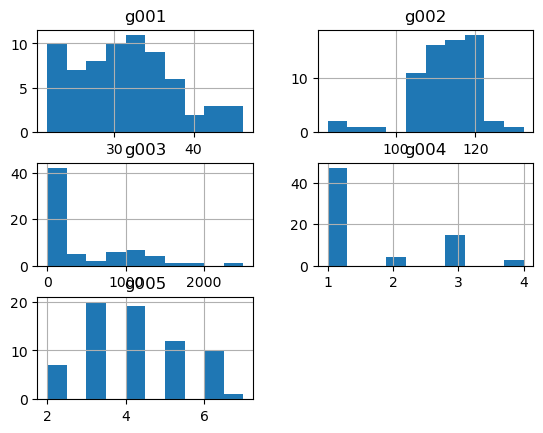

In [143]:
# geography
df[df['xiang']==3].loc[:,'g001':'g005'].hist();
df[df['xiang']==3].loc[:,'g001':'g005'].describe()
#       lat   --   long   --    elev  --   arid  --   heat

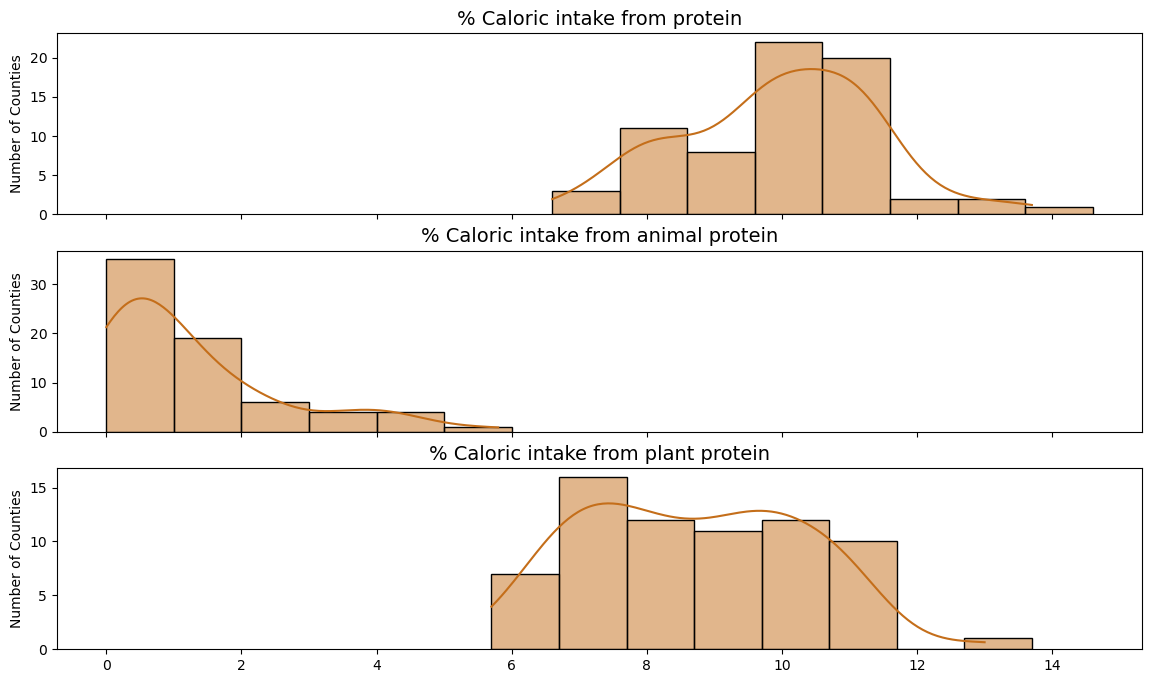

In [179]:
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
cols = {'d006':'% Caloric intake from protein',
        'd007':'% Caloric intake from animal protein',
        'd008':'% Caloric intake from plant protein'}

for i, col in enumerate(cols):
    sns.histplot(ax = axes[i], data = df[(df['xiang'] == 3)], x=col, binwidth=1, kde=True, color='#c46e1a')
    axes[i].set_title(cols[col], fontsize=14)
    axes[i].set(ylabel='Number of Counties', xlabel=None)

plt.show();

In [22]:
dg_to_keep = ['d005','d006','d007','d008','d009', 
              'd012','d013','d014','d015','d016', 
              'd028','d029','d030','d031','d032','d033','d034','d035','d036', 
              'd037','d038','d039','d040', 
              'd041','d042','d043','d044','d045','d046', 
              'd047','d048','d049','d050','d051','d052', 
              'g001','g002','g003','g004','g005']

---
### Part2: merge all 3 dataframes

In [24]:
m_to_keep = ['county', 'sex', 'xiang', 'm005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc']

In [33]:
diet = df.copy()
mortality = ch89m.drop(columns='Unnamed: 0').copy()
pru = ch89pru.drop(columns='Unnamed: 0').copy()
ques = ch89q.drop(columns='Unnamed: 0').copy()

In [34]:
diet.shape, mortality.shape, pru.shape, ques.shape

((206, 169), (201, 122), (483, 110), (621, 250))

In [31]:
diet.county.value_counts(ascending=True)[:5]

JB    2
AA    3
ND    3
OA    3
OB    3
Name: county, dtype: int64

In [32]:
diet[diet.county=='JB']

,county,sex,xiang,d001,d002,d003,d004,d005,d006,d007,...,d157,d158,d159,d160,d161,g001,g002,g003,g004,g005
72,JB,T,1,2594.0,53.3,67.5,460.0,18.5,10.4,0.5,...,0.226,0.002,0.009,0.001,0.002,NaN,NaN,NaN,NaN,NaN
73,JB,T,3,2594.0,53.3,67.5,460.0,18.5,10.4,0.5,...,0.226,0.002,0.009,0.001,0.002,30.6,116.6,50.0,1.0,4.0


In [35]:
first = mortality.merge(diet, how='right', on=['county','sex','xiang'])

In [36]:
second = first.merge(pru, how='right', on=['county','sex','xiang'])

In [43]:
full = second.merge(ques, how='right', on=['county','sex','xiang'])

In [44]:
full[(full.sex=='T') & (full.xiang==3)].isnull().sum().head(15)

county    1
sex       0
xiang     0
m001      4
m002      4
m003      3
m004      4
m005      3
m006      3
m007      4
m008      3
m009      4
m010      3
m011      4
m012      3
dtype: int64

In [45]:
full['county'].fillna('NA', inplace=True)

In [46]:
full[full.county=='NA']

,county,sex,xiang,m001,m002,m003,m004,m005,m006,m007,...,q238,q239,q240,q241,q242,q243,q244,q245,q246,q247
306,NA,M,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NA,M,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.8,0.95,1.32,1.01,15.1,0.94
308,NA,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.8,0.95,1.32,1.01,15.1,0.94
309,NA,F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,94.4,69.4,2.8,NaN,NaN,NaN,NaN,NaN,NaN
310,NA,F,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.1,90.6,78.8,6.1,26.5,0.96,1.31,1.00,15.1,0.95
311,NA,F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,92.5,74.1,4.5,26.5,0.96,1.31,1.00,15.1,0.95
312,NA,T,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NA,T,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NA,T,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.7,0.95,1.32,1.01,15.1,0.94


The mortality columns are expanded horizontally by age.  If we can 'melt' those columns to make them rows instead of features, we could address dimensionality.

In [50]:
practice = full[(full.sex=='T') & (full.xiang==3)][['county','sex','xiang','m001','m002','m003','m004','m005','m006']].copy()

In [51]:
practice.melt(id_vars=['county','sex','xiang'])

,county,sex,xiang,variable,value
0,AA,T,3,m001,3.61
1,AB,T,3,m001,3.64
2,AC,T,3,m001,3.63
3,BA,T,3,m001,3.51
4,BB,T,3,m001,NaN
...,...,...,...,...,...
409,WB,T,3,m006,76.63
410,WC,T,3,m006,70.33
411,XA,T,3,m006,139.52
412,XB,T,3,m006,140.51


Below, I'm using the combined csv Colby created so our work is consistent going forward.

In [205]:
data = pd.read_csv('../data/cleaned_data_descriptive/89all.csv',index_col=[0])

In [206]:
data

,county,sex,xiang,q001,q002,q003,q004,q005,q006,q007,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,AA,M,1,NaN,NaN,NaN,NaN,3.3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,M,2,NaN,NaN,NaN,NaN,3.3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,M,3,NaN,NaN,NaN,NaN,3.3,0.0,NaN,...,3.84,0.46,1.84,7.83,2.61,2.0,0.77,0.0,0.0,4.61
3,AA,F,1,NaN,NaN,NaN,NaN,10.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,F,2,NaN,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,YA,F,2,NaN,NaN,NaN,NaN,16.7,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,YA,F,3,NaN,NaN,NaN,NaN,13.3,0.0,NaN,...,0.00,0.00,0.00,1.92,0.00,0.0,0.00,0.0,0.0,0.00
618,YA,T,1,1.89,6.0,0.5,315.0,NaN,NaN,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,YA,T,2,1.40,7.0,0.4,201.0,NaN,NaN,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
clean_df = data[(data['sex'] == 'T') & (data['xiang'] == 3)]\
.dropna(subset='m005_ALL35_69').dropna(axis = 'columns')
clean_df.head()

,sex,xiang,q001,q002,q003,q004,q005,q006,q007,q008,...,m077_INTESTOBc,m079_CIRRHOSc,m081_TOTLIVRc,m082_GALLBILc,m083_GENITURc,m086_RENALc,m089_ALLSKINc,m090_MUSCSKELc,m092_ILL_DEFc,m103_INFANT
8,T,3,19.7,11.0,5.4,1748.0,7.3,0.0,4.2,27.1,...,0.36,35.36,113.19,10.97,18.80,18.44,4.10,1.85,1.48,8.22
17,T,3,24.1,17.0,6.7,1435.0,8.3,0.0,4.4,8.5,...,2.10,27.11,129.42,6.77,15.41,15.41,0.81,1.34,3.87,11.61
26,T,3,21.3,16.0,5.9,1431.0,2.5,0.8,4.3,16.3,...,1.94,26.84,100.35,19.55,20.56,20.56,2.46,2.27,4.82,12.44
35,T,3,20.7,13.0,4.6,1867.0,7.4,0.8,4.9,24.6,...,4.79,34.54,96.46,0.00,6.58,4.78,0.00,0.53,6.52,10.74
44,T,3,13.4,18.0,3.5,688.0,4.1,1.6,3.6,6.0,...,1.94,27.21,87.30,0.00,15.22,12.70,0.59,5.48,7.74,8.79


---
### Part3: modeling

code copied from Colby's modeling-ct.ipynb notebook to keep results consistent

In [208]:
results = pd.DataFrame(columns = ['Model', 'Train Score', 'Val Score', 'X Val Score', 'RMSE Train', 'RMSE Val'])

def update_df(model, model_name, Xs_train, Xs_test, y_train, y_test):
    '''fn updates a dataframe for quick reference of R squared scores and RMSE'''
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        train_score = model.score(Xs_train, y_train)
        val_score = model.score(Xs_test, y_test)
        x_val_score = cross_val_score(model, Xs_train, y_train).mean()
        rmse1 = mean_squared_error(y_train, model.predict(Xs_train))**0.5
        rmse2 = mean_squared_error(y_test, model.predict(Xs_test))**0.5
        
        results.loc[len(results.index)] = [model_name, train_score, val_score, x_val_score, rmse1, rmse2] 
        
    return results

In [209]:
def new_model(df, target):
    import warnings
    '''fn takes in a dataframe and a target column and returns a lasso linear regression.
    model_type should be one of ['linear','lasso','ridge']'''
    #col_to_drop = []
    col_to_drop = ['sex','xiang']
    for col in df.columns:
        if 'm' in col:
            col_to_drop.append(col)
    
    y = df[target]
    X = df.drop(columns=col_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
    
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test)
    
    lcv = LassoCV(alphas = np.arange(0.001, 10, 1))
    
    #fit it!
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        lcv.fit(Xs_train, y_train)
    
    update_df(lcv, f'lasso-{target}', Xs_train, Xs_test, y_train, y_test)

In [213]:
m_targets = ['m005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc']

In [218]:
#baseline for m005_ALL35_69, which is all causes for the 35-69 age bracket
baseline = clean_df.m005_ALL35_69.mean()
print(f"The baseline score for this target is {round(baseline,2)} deaths per 1,000.")

The baseline score for this target is 14.05 deaths per 1,000.


In [214]:
new_model(clean_df, 'm005_ALL35_69')

In [215]:
for m in m_targets:
    new_model(clean_df, m)

In [216]:
results

,Model,Train Score,Val Score,X Val Score,RMSE Train,RMSE Val
0,lasso-m005_ALL35_69,0.147550,-0.330983,-0.051191,2.802176,3.587015
1,lasso-m005_ALL35_69,0.147550,-0.330983,-0.051191,2.802176,3.587015
2,lasso-m008_MEDICALc,0.149356,-0.255595,0.001429,2.592976,3.391851
3,lasso-m065_STROKEc,0.853114,0.330202,-0.030187,32.813690,116.793464
4,lasso-m023_ALLCAc,0.999988,0.119094,-0.331027,0.007585,1.603301
5,lasso-m059_ALLVASCc,0.999976,0.368306,-0.018055,0.006362,1.670806
6,lasso-m028_OESOPHCAc,0.940795,0.155061,0.049258,23.251942,99.581067
7,lasso-m072_COPDc,0.875413,-1.653974,0.141373,43.226285,100.242489
8,lasso-m010_NONMEDc,0.817252,-1.669859,-0.735769,20.877920,43.555044


In [72]:
mortality.columns[3:]

Index(['m001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009',
       'm010',
       ...
       'm110', 'm111', 'm112', 'm113', 'm114', 'm115', 'm116', 'm117', 'm118',
       'm119'],
      dtype='object', length=119)

---
### Part4: Feature Importance and Analysis

Using Colby's code for feature_lookup and importing in the feature coefficient values from the saved csv's

In [87]:
feature_importance_male = pd.read_csv('../results/feature_importance_m.csv',index_col=[0])
feature_importance_female = pd.read_csv('../results/feature_importance_f.csv',index_col=[0])

In [94]:
m_to_analyze = ['m005_ALL35_69', 'm008_MEDICALc', 'm065_STROKEc', 'm023_ALLCAc',
       'm059_ALLVASCc', 'm028_OESOPHCAc', 'm072_COPDc', 'm010_NONMEDc']

In [184]:
feature_importance_male.iloc[:,60:80]

,m064_STROKEb,m065_STROKEc,m066_VASC_STRb,m067_VASC-STRc,m068_ALLRESPb,m069_ALLRESPc,m070_PNEUMONb,m071_PNEUMONc,m072_COPDc,m073_DIGESTIVb,m074_DIGESTIVc,m075_PEPULCERc,m076_ENTCOLc,m077_INTESTOBc,m078_CIRRHOSb,m079_CIRRHOSc,m080_TOTLIVRb,m081_TOTLIVRc,m082_GALLBILc,m083_GENITURc
0,0.0,-14.297492,-4.714889e-03,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.322168,0.000000,0.0,-0.0,-0.000000,0.0
1,0.0,-0.000000,4.504643e-01,0.0,6.621061,0.000000,6.176380,0.000000,0.000000,0.000000,-0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.0,-0.0,-0.000000,0.0
2,0.0,-0.000000,0.000000e+00,0.0,0.000000,24.001167,0.000000,6.111690,8.216462,0.020673,0.0,0.0,0.744207,0.848068,-0.000000,0.000000,-0.0,-0.0,-0.000000,0.0
3,0.0,-0.000000,2.659093e-15,0.0,0.487972,0.000000,0.545812,0.000000,0.000000,0.000000,-0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.0,-0.0,-0.000000,0.0
4,0.0,0.000000,1.625057e-01,-0.0,0.000000,3.902814,0.000000,-0.000000,8.714850,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.395098,-0.000000,-0.0,0.0,-0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.0,0.000000,-0.000000e+00,-0.0,0.000000,0.103420,0.000000,-0.000000,0.000000,-0.000000,0.0,-0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.0,0.0,0.000000,-0.0
224,-0.0,-0.000000,-0.000000e+00,0.0,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.0,-0.0,0.000000,-0.000000,0.407182,3.249273,0.0,0.0,0.000000,0.0
225,-0.0,-0.000000,-3.451673e-02,0.0,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.0,-0.0,0.000000,-0.000000,0.219489,0.154926,0.0,0.0,0.164919,0.0
226,-0.0,-0.000000,3.742739e-02,0.0,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,0.090637,0.000000,-0.0,-0.0,-0.000000,-0.0


In [104]:
feature_importance_male['m010_NONMEDc'].max()

14.457199350659884

In [108]:
max_impact = [feature_importance_male[col].max() for col in m_to_analyze]
max_impact

[0.0,
 0.0,
 34.89124000241653,
 0.7117458254617429,
 0.0,
 24.23154904026728,
 29.17897372905003,
 14.457199350659884]

In [199]:
# created a function to easily lookup targets by gender
def feature_lookup(x, gender):
    '''fn takes specific mortality feature "x" and gender to lookup 
    feauture importance with the associated mortality '''
    gender = gender.lower()
    
    if gender == 'male' or gender =='m':
        return feature_importance_male[[x, 'description']][feature_importance_male[x]>0]\
                .sort_values(by=x,ascending=False).head()
    elif gender == 'female' or gender == 'f':
        return feature_importance_female[[x, 'description']]\
                [np.abs(feature_importance_female[x])>0]\
                .sort_values(by=x,ascending=False).head()
    else:
        return print(f"Please enter a valid input")


In [200]:
feature_lookup('m029_COLRECCAc', 'f')

,m029_COLRECCAc,description
157,3.031821,Q095 dSCHISTO questionnaire PERCENTAGE WITH ...
25,1.092013,Q245 fHTadj questionnaire HEIGHT OF SCHOOL...
242,0.979894,Q151 dBEERday questionnaire CURRENT DAILY CO...
23,0.806137,Q243 fWTadj questionnaire WEIGHT OF SCHOOL...
111,0.705052,P024 FOLATE plasma FOLATE (ng/mL) ...


In [201]:
feature_lookup('m012_INFECTc', 'm')

,m012_INFECTc,description
85,7.742770,U032 TNOCa nitrosamine study TOTAL NITROS...
198,5.660898,Q157 dRICE questionnaire DAILY CONSUMPTIO...
212,5.516975,Q134 dSMOK<25m questionnaire PERCENT OF TOTAL...
5,4.841607,P025 VITC plasma VITAMIN C (ascorbic aci...
31,3.707410,P021 NEURSPOR plasma NEUROSPORENE (ug/dL) ...
